In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
ghj=df.copy()

In [322]:
selected_features = ['wheelbase','carlength','carwidth','carheight']  # Replace with the names of your numerical features
target_label = 'price'

In [324]:
correlation_matrix = ghj[selected_features + [target_label]].corr()
print(correlation_matrix)

           wheelbase  carlength  carwidth  carheight     price
wheelbase   1.000000   0.874587  0.795144   0.589435  0.577816
carlength   0.874587   1.000000  0.841118   0.491029  0.682920
carwidth    0.795144   0.841118  1.000000   0.279210  0.759325
carheight   0.589435   0.491029  0.279210   1.000000  0.119336
price       0.577816   0.682920  0.759325   0.119336  1.000000


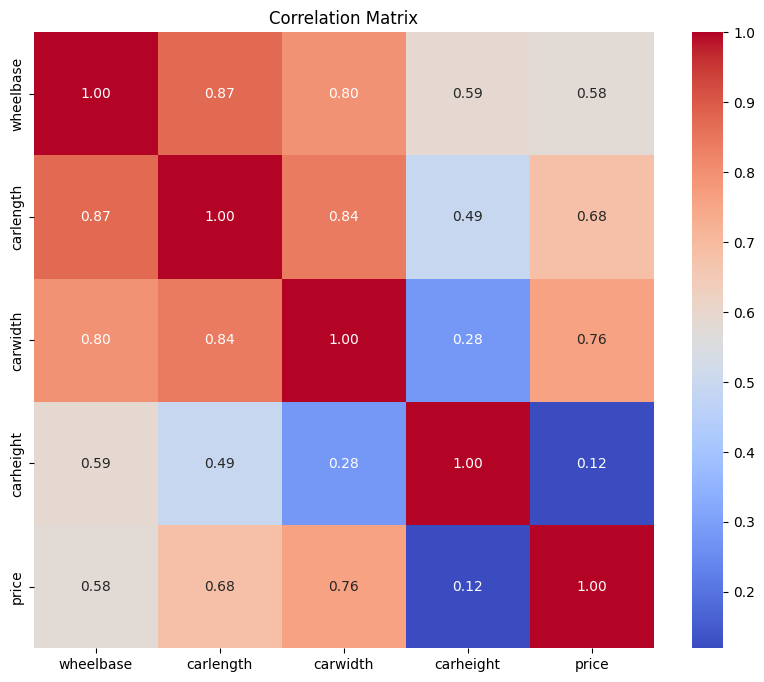

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [100]:
df=pd.read_csv("CarPrice.csv")

In [101]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [103]:
df.drop(["car_ID","CarName","symboling","aspiration","boreratio","highwaympg","cylindernumber","fuelsystem"],axis=1,inplace=True)

In [104]:
df.head()

,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,2.68,9.0,111,5000,21,13495.0
1,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,2.68,9.0,111,5000,21,16500.0
2,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,3.47,9.0,154,5000,19,16500.0
3,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,3.40,10.0,102,5500,24,13950.0
4,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,3.40,8.0,115,5500,18,17450.0


In [105]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [106]:
df.dtypes

fueltype             object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
enginesize            int64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
dtype: object

In [107]:
df.fueltype=df.fueltype.apply(lambda x:0 if x=="gas" else 1)

In [108]:
df.doornumber=df.doornumber.apply(lambda x:2 if x=="two" else 4)

In [109]:
df.enginelocation=df.enginelocation.apply(lambda x:0 if x=="front" else 1)

In [110]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [111]:
df.head()

,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,130,2.68,9.0,111,5000,21,13495.0
1,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,130,2.68,9.0,111,5000,21,16500.0
2,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,152,3.47,9.0,154,5000,19,16500.0
3,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,109,3.40,10.0,102,5500,24,13950.0
4,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,136,3.40,8.0,115,5500,18,17450.0


In [112]:
x=df.drop("price",axis=1)

In [113]:
y=df["price"]

In [114]:
x.shape

(205, 17)

In [115]:
y.shape

(205,)

In [116]:
x

,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg
0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,130,2.68,9.0,111,5000,21
1,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,130,2.68,9.0,111,5000,21
2,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,152,3.47,9.0,154,5000,19
3,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,109,3.40,10.0,102,5500,24
4,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,136,3.40,8.0,115,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,4,sedan,rwd,0,109.1,188.8,68.9,55.5,2952,ohc,141,3.15,9.5,114,5400,23
201,0,4,sedan,rwd,0,109.1,188.8,68.8,55.5,3049,ohc,141,3.15,8.7,160,5300,19
202,0,4,sedan,rwd,0,109.1,188.8,68.9,55.5,3012,ohcv,173,2.87,8.8,134,5500,18
203,1,4,sedan,rwd,0,109.1,188.8,68.9,55.5,3217,ohc,145,3.40,23.0,106,4800,26


In [117]:
dg=ColumnTransformer([
    ("Hot",OneHotEncoder(),[2,3,10]),
    ("Z-Score",StandardScaler(),[5,6,7,8,9,11,12]),
    ("Scale",MinMaxScaler(),[13,14,15,16])  
],remainder="passthrough")

In [118]:
X=dg.fit_transform(x)

In [119]:
x.columns

Index(['fueltype', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [120]:
X_new=pd.DataFrame(X)

In [121]:
X_new.shape

(205, 29)

In [122]:
X_new.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.014566,0.074449,-1.839377,0.1250,0.262500,0.346939,0.222222,0.0,2.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.014566,0.074449,-1.839377,0.1250,0.262500,0.346939,0.222222,0.0,2.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.514882,0.604046,0.685946,0.1250,0.441667,0.346939,0.166667,0.0,2.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.420797,-0.431076,0.462183,0.1875,0.225000,0.551020,0.305556,0.0,4.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.516807,0.218885,0.462183,0.0625,0.279167,0.551020,0.138889,0.0,4.0,0.0


In [123]:
po=[]
for i in range(29):
    if(len(X_new[i].unique())!=2):
        po.append(i)

In [124]:
po

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

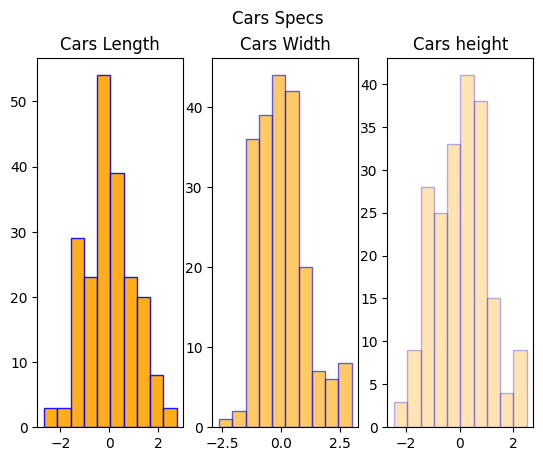

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].hist(X_new[16],color="orange",alpha=0.9,edgecolor="blue")
ax[1].hist(X_new[17],color="orange",alpha=0.6,edgecolor="blue")
ax[2].hist(X_new[18],color="orange",alpha=0.3,edgecolor="blue")
# plot 2 subplots
ax[0].set_title('Cars Length')
ax[1].set_title('Cars Width')
ax[2].set_title('Cars height')
fig.suptitle('Cars Specs')
plt.show()

In [126]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,random_state=12,test_size=0.2)

In [142]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

In [143]:
from sklearn import set_config as sc

In [144]:
sc(display="diagram")

In [307]:
robust=make_pipeline(PCA(n_components=21),LinearRegression())

In [308]:
robust

Pipeline(steps=[('pca', PCA(n_components=21)),
                ('linearregression', LinearRegression())])

In [309]:
x_train.shape

(164, 29)

In [310]:
y_train.shape

(164,)

In [311]:
robust.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=21)),
                ('linearregression', LinearRegression())])

In [312]:
robust.score(x_test,y_test)

0.8091925034553793

In [313]:
robust["pca"].n_components_

21

In [314]:
y_pred=robust.predict(x_test)

In [315]:
y_test

array([ 5399., 17710., 15510., 12764., 16925., 10945., 10595.,  7609.,
        6938., 18920.,  6855.,  5572., 10245., 13200., 16845.,  5348.,
       32528.,  9639., 13295., 11694., 16515.,  7198.,  7898., 11549.,
        7053.,  6849., 12290., 41315.,  8195.,  9988.,  7099.,  7957.,
        8189.,  9895.,  6229., 13845.,  6189., 12964.,  9298., 16695.,
        7299.])

In [316]:
y_pred

array([ 5968.01138384, 18989.65613284, 13763.21538268, 16077.62996128,
       13979.93748019, 12487.96634479,  9906.89968276,  6896.25911265,
        7275.13162586, 17010.74939126,  7910.79691334,  5207.49003504,
       11673.35309743, 18269.39234503, 20552.00280469,  5929.0782422 ,
       30443.92559388, 15431.22127715, 16384.77584622,  9172.45295544,
       17434.57098677,  6767.34670209,  5778.55155316, 14447.27675977,
        8227.49591865,  7043.22100458,  9147.91960908, 27957.74999458,
       10518.40191954,  9527.89387549,  6952.32155032,  7511.31636746,
       10390.47824134,  9789.4260779 ,  6296.43456295,  9313.03484172,
        6506.2839892 , 14610.59385711, 10342.11067411, 14790.65163212,
        6531.56740213])

In [317]:
from sklearn import metrics
LinearRegression_MAE = metrics.mean_absolute_error(y_test,y_pred)
LinearRegression_MSE = metrics.mean_squared_error(y_test,y_pred)
LinearRegression_R2 = metrics.r2_score(y_test,y_pred)

In [318]:
Report = pd.DataFrame({"MAE":[LinearRegression_MAE],"MSE":[LinearRegression_MSE],"R2":[LinearRegression_R2]})
print("LINEAR MODEL:")
print(Report)

LINEAR MODEL:
          MAE           MSE        R2
0  1974.05304  9.064122e+06  0.809193
